In [1]:
pip install strawberryfields --upgrade

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 32.9 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 59.7 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB ? eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 54.1 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import math as math
import strawberryfields as sf 
from strawberryfields.ops import *
from strawberryfields.apps import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpmath import *

In [2]:
# define critical variables 
epsilon = 0.08
shots = 1500
scale = np.sqrt(sf.hbar * np.pi)

***Create the orthonormal basis for GKP***

In [3]:
zero = [0, 0]
one = [np.pi, 0]


prog_gkp_1 = sf.Program(1)
with prog_gkp_1.context as q:
    sf.ops.GKP(state = one, epsilon=epsilon) | q
    sf.ops.MeasureX | q
eng = sf.Engine("bosonic")
gkp_samples_1 = eng.run(prog_gkp_1, shots=shots).samples[:, 0]



prog_gkp_0 = sf.Program(1)
with prog_gkp_0.context as q:
    sf.ops.GKP(state = zero, epsilon=epsilon) | q
    sf.ops.MeasureX | q
eng = sf.Engine("bosonic")
gkp_samples_0 = eng.run(prog_gkp_0, shots=shots).samples[:, 0]

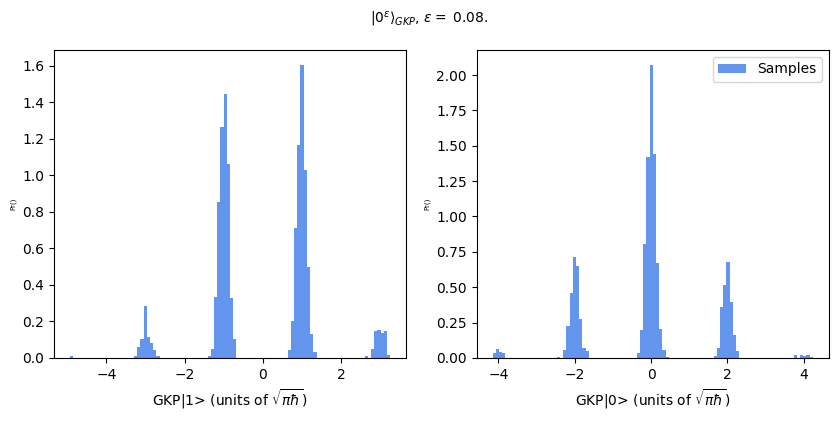

In [10]:
# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(r"$|0^\epsilon\rangle_{GKP}$, $\epsilon=$ " + str(epsilon) + ".", fontsize=10)

axs[0].hist(gkp_samples_1 / scale, bins=100, density=True, label="Samples", color="cornflowerblue")
axs[0].set_xlabel(r"GKP|1> (units of $\sqrt{\pi\hbar}$)", fontsize=10)
axs[0].set_ylabel("Pr()", fontsize=5)

axs[1].hist(gkp_samples_0 / scale, bins=100, density=True, label="Samples", color="cornflowerblue")
axs[1].set_xlabel(r"GKP|0> (units of $\sqrt{\pi\hbar}$)", fontsize=10)
axs[1].set_ylabel("Pr()", fontsize=5)

axs[1].legend()
axs[0].tick_params(labelsize=10)
axs[1].tick_params(labelsize=10)
plt.show()

***Create the orthonormal basis for Cat***